**Dijkstra**

Used to find the shorthest path in a directed graph

Greedy algorithm.

This example uses:
*  cv2  
*  heapq



import cv2
import matplotlib.pyplot as plt
import numpy as np



1.   Eduardo Badillo Á.: https://github.com/EduBalez/Sistemas-Inteligentes 
2.   Roberto Gutierrez : https://github.com/axgtz/Sistemas-Inteligentes        
3.   Emilio Hernández: https://github.com/emihdz97/sistemas-inteligentes



In [ ]:
import heapq
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Helper functions and classes
class Vertex:
    def __init__(self,x_coord,y_coord): #New node constructor  
        self.x=x_coord
        self.y=y_coord
        self.d=float('inf') #distance from source
        self.parent_x=None
        self.parent_y=None
        self.processed=False
        self.index_in_queue=None

#Return neighbor directly above, below, right, and left
def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed:
         neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed:
            neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed:
            neighbors.append(mat[r][c+1])
    return neighbors

# Receives the position of the starter node in the heap
# Swaps the positions of the vertices until starter node is first
def bubble_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].d < queue[p_index].d:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = bubble_up(queue, p_index)
    return queue
    
def bubble_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: #just left child
        if queue[index].d > queue[lc_index].d:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = bubble_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].d > queue[rc_index].d:
            small = rc_index
        if queue[small].d < queue[index].d:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = bubble_down(queue, small)
    return queue

# adding 0.1 to avoid any 0 distance (euclidean squared distance)
def get_distance(img,u,v):
    return 0.1 + (float(img[v][0])-float(img[u][0]))**2+(float(img[v][1])-float(img[u][1]))**2+(float(img[v][2])-float(img[u][2]))**2

# Draw correct line
def drawPath(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        # Draw line 
        cv2.line(img,(x0,y0),(x1,y1),(255,0,0),thickness)
        x0,y0=vertex

Create heap array to keep track of unprocessed nodes. We get coordinates for start and end vertices. Then we get the dimensions of the image object and create an empty matrix with those dimensions. Then we create a vertex out of each pixel in the image and store it in the matrix. We update the properties of the vertex with its index in the unprocessed queue and store the vertex itself in the heap.


In [ ]:
def find_shortest_path(img,src,dst):
    pq=[] # min-heap priority queue to keep track of unprocessed nodes
    
    # Get coordinates for start and end vertex
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]

    # Get dimensions of the img object
    imagerows,imagecols=img.shape[0],img.shape[1]

    # Return a new, empty matrix object with the img dimensions
    matrix = np.full((imagerows, imagecols), None) #access by matrix[row][col]

    # Matrix is equvialent to all the unvisited nodes
    # Loop throught the whole matrix
    for r in range(imagerows):
        for c in range(imagecols):
          # Create a new vertex obj with img coordinates
          # & map it to matrix
            matrix[r][c]=Vertex(c,r) 

          # Add to the vertex the position in the queue
            matrix[r][c].index_in_queue=len(pq)

          # Append the vertex to the unprocessed nodes queue
            pq.append(matrix[r][c])
    

Every vertex has a property that keeps track of the distance from the source to itself, that is why we update the origin vertex in the matrix to a distance of 0. We then make its position in the heap to be in the front of the queue and reorder the queue accordingly. Then the dijsktra component starts, we begin to process the nodes stored in the heap, we store the vertex on the local variable and delete it from the queue, the queue gets reordered and the neighbors of the vertex are found. They each get a new distance to the source vertex and a new parent vertex in their properties. In each iteration the queue it's getting reordered.

In [ ]:

    #### STILL INSIDE THE FUNCTION
    # Set source distance value to 0, since it's the starting node
    matrix[source_y][source_x].d=0
    
    
    # Reorders the heap until the first position is the starting vertex
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    
    # Assign distance values to all pixel vertices in the maze
    while len(pq) > 0:
        # get curreent/origin vertex in heap
        u=pq[0]
        
        # change processed status
        u.processed=True

        # set next vertex in heap as origin/current vertex
        pq[0]=pq[-1]
        pq[0].index_in_queue=0
        
        # delete from heap the previous origin/current vertex
        pq.pop()
        pq=bubble_down(pq,0)

        # get list of neighbors of current vertex
        neighbors = get_neighbors(matrix,u.y,u.x)

        
        # go through all the neighbours
        for v in neighbors:

            # get euclidean distance from current vertex to neighbor
            dist=get_distance(img,(u.y,u.x),(v.y,v.x))

            # DIJSKTRA PART 
            # If the distance calculated is shorter than the 
            # neighbor's distance assign that new distance length
            # to neighbor 
            # assign neighbor's parent the current vertex and reorder
            # the heap vector
            if u.d + dist < v.d:
                v.d = u.d+dist
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)

   

Finally we build a traversed path starting from destination coordinates to origin coordinates. We can retrace our steps thanks to the parent property in each vertex which we updated when processing the queue. We append each parent of the vertices until the origin vertex is arrived and we return the result.

In [ ]:
 ##### STILL INSIDE THE FUNCTION
 # Appends to array all visiting vertices
    # until the desination vertex is reached                         
    path=[]
    iter_v=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]

    # Lastly, append the beginning vertex 
    # to path and return 
    path.append((source_x,source_y))
    return path

TypeError: ignored

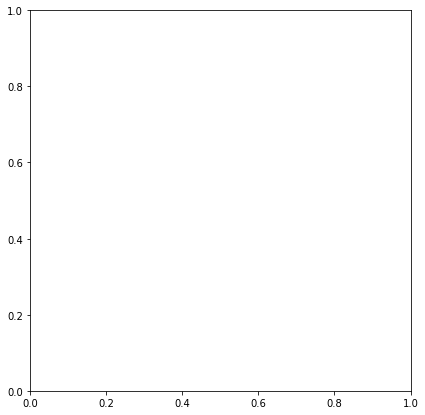

In [ ]:
img = cv2.imread('maze.png') # read the image 
cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img)  
plt.show()

In [ ]:
img = cv2.imread('maze.png') # read image
cv2.imwrite('maze-initial.png', img)
p = find_shortest_path(img, (25,5), (5,220))
drawPath(img,p)
cv2.imwrite('maze-solution.png', img)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()

TypeError: ignored

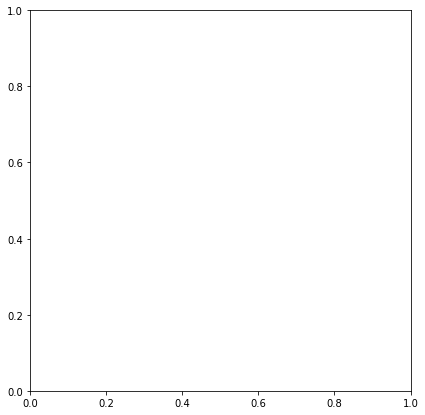

In [ ]:
img = cv2.imread('maze5.jpg') # read the image 
cv2.circle(img,(5,320), 3, (255,0,0), -1) # add a circle at (5, 220)
cv2.circle(img, (300,300), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img)  
plt.show()

In [ ]:
img = cv2.imread('maze5.jpg') # read image
cv2.imwrite('maze-initial5.jpg', img)
p = find_shortest_path(img, (300,300), (5,320))
drawPath(img,p)
cv2.imwrite('maze-solution5.jpg', img)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image on the screen 
plt.show()

error: ignored